In [494]:
import pandas as pd
import numpy as np
import random

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
# set max column width to display all column information properly
pd.set_option('display.max_colwidth', -1)

C:\Users\crazy\AppData\Local\Temp\ipykernel_11820\3652881321.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [24]:
books = pd.read_csv('C:/Users/crazy/OneDrive/Desktop/BookCrossing/BX-Books.csv', sep=';', encoding = 'latin-1', 
                   on_bad_lines='skip')

books.columns = ['isbn', 'book_title', 'book_author', 'year_of_publication', 'publisher', 
                 'image_url_s', 'image_url_m', 'image_url_l']

C:\Users\crazy\AppData\Local\Temp\ipykernel_11820\310732244.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('C:/Users/crazy/OneDrive/Desktop/BookCrossing/BX-Books.csv', sep=';', encoding = 'latin-1',


In [208]:
users = pd.read_csv('C:/Users/crazy/OneDrive/Desktop/BookCrossing/BX-Users.csv', sep=';', encoding = 'latin-1', 
                   on_bad_lines='skip')

users.columns = ['user_id', 'location', 'age']

In [209]:
ratings = pd.read_csv('C:/Users/crazy/OneDrive/Desktop/BookCrossing/BX-Book-Ratings.csv', sep=';', encoding = 'latin-1', 
                   on_bad_lines='skip')

ratings.columns = ['user_id', 'isbn', 'book_rating']

## Books

In [30]:
books.head()

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [37]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   isbn                 271360 non-null  object
 1   book_title           271360 non-null  object
 2   book_author          271359 non-null  object
 3   year_of_publication  271360 non-null  object
 4   publisher            271358 non-null  object
 5   image_url_s          271360 non-null  object
 6   image_url_m          271360 non-null  object
 7   image_url_l          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


### image_url_s, image_url_m, image_url_l
- does not seem that image links will contribute to recommender analysis
- safe to assume we can drop these columns

In [62]:
books = books.drop(['image_url_s', 'image_url_m', 'image_url_l'], axis = 1)

In [63]:
books.head()

,isbn,book_title,book_author,year_of_publication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


### year_of_publication
- why is this column an object instead of an int?

In [43]:
books['year_of_publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

- some values are actual years
- 'DK Publishing Inc' and 'Gallimard' appear in the years
- some of the years are entered as strings
- year 0 does not make sense and years greater than the date the dataset was gathered, 2004, does not make sense

In [78]:
# looking into the rows where 'year_of_publication' is DK Publishin Inc
books[books['year_of_publication'] == 'DK Publishing Inc']

,isbn,book_title,book_author,year_of_publication,publisher
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg


It seems that the book_title did not get separated properly with the author on these rows
- We need to alter these two rows manually
- Start by altering from the right most column, then work leftwards
- on index 209538 and 221678

##### For index at 209538

In [73]:
# alter publisher 
books.loc[209538,'publisher'] = 'DK Publishing Inc'

In [76]:
# alter year_of_publication
books.loc[209538, 'year_of_publication'] = 2000

In [86]:
# alter book_author
books.loc[209538, 'book_author'] = 'Michael Teitelbaum'

In [89]:
# alter book_title
books.loc[209538, 'book_title'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'

##### For index at 221678

In [93]:
# alter publisher 
books.loc[221678,'publisher'] = 'DK Publishing Inc'

In [95]:
# alter year_of_publication
books.loc[221678, 'year_of_publication'] = 2000

In [101]:
# alter book_author
books.loc[221678, 'book_author'] = 'James Buckley'

In [102]:
# alter book_title
books.loc[221678, 'book_title'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'

In [109]:
# row should be properly set now
books.loc[221678]

isbn                   0789466953                                                                                
book_title             DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)
book_author            James Buckley                                                                             
year_of_publication    2000                                                                                      
publisher              DK Publishing Inc                                                                         
Name: 221678, dtype: object

For year_of_publication = 'Gallimard'
- index is at 220731
- need to adjust this row as well

##### For index at 220731

In [103]:
# alter publisher 
books.loc[220731,'publisher'] = 'Gallimard'

In [104]:
# alter year_of_publication
books.loc[220731,'year_of_publication'] = '2003'

In [105]:
# alter book_author 
books.loc[220731,'book_author'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'

In [106]:
# alter book_title
books.loc[220731,'book_title'] = "Peuple du ciel, suivi de 'Les Bergers"

In [108]:
# row should be properly set now
books.loc[220731]

isbn                   2070426769                           
book_title             Peuple du ciel, suivi de 'Les Bergers
book_author            Jean-Marie Gustave Le ClÃ?Â©zio      
year_of_publication    2003                                 
publisher              Gallimard                            
Name: 220731, dtype: object

#### Next, we need to change the type of this field to be int, and thus will get rid of the quotes as well

In [111]:
books['year_of_publication'] = books['year_of_publication'].astype(int)

#### Remove the year_of_publication = 0 or > 2008 (4 year margin in case the dataset was updated)
- First we filter these affect years and set then to NaN
- then we can use fillnan to a certain value
- for simplisticity sake, we'll use the year_of_publication mean

In [145]:
# set the erroneous values to NaN using numpy
books.loc[(books['year_of_publication'] == 0) | (books['year_of_publication'] > 2008), 'year_of_publication'] = np.NAN

In [157]:
# calculate the year_of_publication mean
pub_mean =  round(books['year_of_publication'].mean())

In [163]:
# replace NaN with the publication mean
books['year_of_publication'] = books['year_of_publication'].fillna(pub_mean)

In [165]:
# need to convert the type back to int because np.NAN convert column to a float
books['year_of_publication'] = books['year_of_publication'].astype(int)

### book_author
- We have one NaN book_author

In [170]:
books[books['book_author'].isnull()]

,isbn,book_title,book_author,year_of_publication,publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Personal Wealth,NaN,1995,Edinburgh Financial Publishing


Quick google search shows that the author of this book is Larissa Anne Downes

In [175]:
books.loc[187689, 'book_author'] = 'Larissa Anne Downes'

### book_publisher
- there are two null values

In [184]:
books[books['publisher'].isnull()]

,isbn,book_title,book_author,year_of_publication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


Another quick google search shows that Tyrant Moon was published by Mundania Press and Finders Keepers was published by Bantam.

In [193]:
books.loc[128890, 'publisher'] = 'Mundania Press'
books.loc[129037, 'publisher'] = 'Bantam'

In [194]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   isbn                 271360 non-null  object
 1   book_title           271360 non-null  object
 2   book_author          271360 non-null  object
 3   year_of_publication  271360 non-null  int32 
 4   publisher            271360 non-null  object
dtypes: int32(1), object(4)
memory usage: 9.3+ MB


## Users

In [210]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   278858 non-null  int64  
 1   location  278858 non-null  object 
 2   age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [211]:
# this column seems fine
users['user_id'].nunique()

278858

In [216]:
# we will leave 'location' column untouched for now
users['location'].head()

0    nyc, new york, usa                
1    stockton, california, usa         
2    moscow, yukon territory, russia   
3    porto, v.n.gaia, portugal         
4    farnborough, hants, united kingdom
Name: location, dtype: object

In [219]:
# lets peek at the age values
sorted(users['age'].unique())

[nan,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 113.0,
 114.0,
 115.0,
 116.0,
 118.0,
 119.0,
 123.0,
 124.0,
 127.0,
 128.0,
 132.0,
 133.0,
 136.0,
 137.0,
 138.0,
 140.0,
 141.0,
 143.0,
 146.0,
 147.0,
 148.0,
 151.0,
 152.0,
 156.0,
 157.0,
 159.0,


NaN, 5 < age < 90 don't seem to make sense. Just like what we did above with year_of_publication, we'll set those values to NaN then fill it with the mean age. 

In [222]:
# set these particular age values to NaN
users.loc[(users['age'] < 5) | (users['age'] > 90), 'age'] = np.NAN

In [224]:
# find the mean of the age
age_mean =  round(users['age'].mean())

In [225]:
# set the NaN values to mean age
users['age'] = users['age'].fillna(age_mean)

In [227]:
# here's a sorted view now of the ages
print(sorted(users['age'].unique()))

[5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0]


In [228]:
# set the age column type to be int
users['age'] = users['age'].astype(int)

## Ratings

In [230]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   user_id      1149780 non-null  int64 
 1   isbn         1149780 non-null  object
 2   book_rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [231]:
ratings.head()

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Ratings Visualized

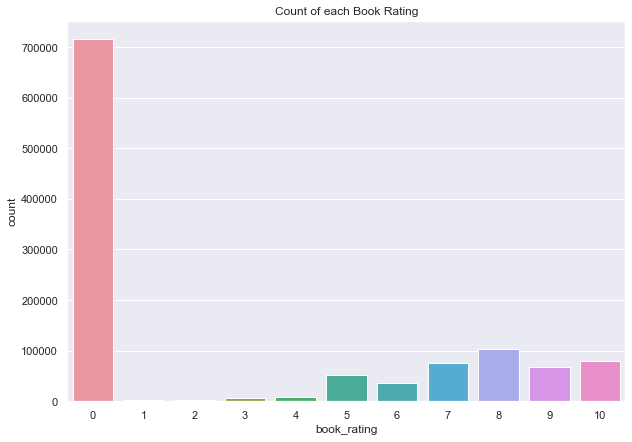

In [253]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 7))
sns.countplot(x='book_rating', data=ratings).set(title='Count of each Book Rating');

The dataset contains both explicit ratings: entered by user and implicit ratings: not entered by user, default to 0

### Possible issue with books existing in both ratings and books table
- The books in the ratings table should also exist in the books table
    - A discrepancy means that some users rated books that do not appear or exist in our books table

In [332]:
# the shape of our ratings table
ratings.shape

(1149780, 3)

In [328]:
# A check to see if all/which books rated in ratings table 
# also exist in books table 
ratings2 = ratings[ratings['isbn'].isin(books['isbn'])]
ratings2.shape

(1031136, 3)

As you can see, the unique isbn's in books is actually a subset of the isbn's in ratings. This should give us a hint or let us know how we should proceed when joining the tables.

Now from that subset, lets check to see if those all those users also appear in our users table.

In [331]:
# Lets see if all users that made ratings are a part of the users table
ratings3 = ratings2[ratings2['user_id'].isin(users['user_id'])]
ratings3.shape

(1031136, 3)

Conclusion: There's no difference there between the user_id's in user and ratings table.

### Merging our three datasets
We want to combine our tables in this type of manner:
- Users INNER JOIN (Books LEFT JOIN Ratings)

In [336]:
# similar to Books LEFT JOIN Ratings USING isbn
merged_df = books.merge(ratings, on='isbn', how='left')

In [338]:
# now to merge the above dataframe to our users dataframe
# similar to Users JOIN merged_df USING user_id
df = merged_df.merge(users, on='user_id', how='inner')

In [340]:
# dimensions of our combined datasets show it is the same as our check above
df.shape

(1031136, 9)

In [342]:
df.head(10)

,isbn,book_title,book_author,year_of_publication,publisher,user_id,book_rating,location,age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2.0,0.0,"stockton, california, usa",18
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8.0,5.0,"timmins, ontario, canada",35
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,8.0,0.0,"timmins, ontario, canada",35
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,8.0,0.0,"timmins, ontario, canada",35
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,8.0,0.0,"timmins, ontario, canada",35
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,8.0,0.0,"timmins, ontario, canada",35
6,0425176428,What If?: The World's Foremost Military Historians Imagine What Might Have Been,Robert Cowley,2000,Berkley Publishing Group,8.0,0.0,"timmins, ontario, canada",35
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,8.0,0.0,"timmins, ontario, canada",35
8,0679425608,Under the Black Flag: The Romance and the Reality of Life Among the Pirates,David Cordingly,1996,Random House,8.0,0.0,"timmins, ontario, canada",35
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,8.0,5.0,"timmins, ontario, canada",35


## Data backup and CSV export

In [356]:
books.to_csv('books.csv', index = False)

In [357]:
users.to_csv('users.csv', index = False)

In [358]:
ratings.to_csv('ratings.csv', index = False)

In [359]:
df.to_csv('bookCrossingDf.csv', index = False)

### Now lets deal with the implicit book_ratings
- We can create a new dataframe from our merged dataframe by filtering out all book_ratings of 0

In [382]:
dfe = df[df['book_rating'] != 0]

In [383]:
dfe.shape

(383842, 9)

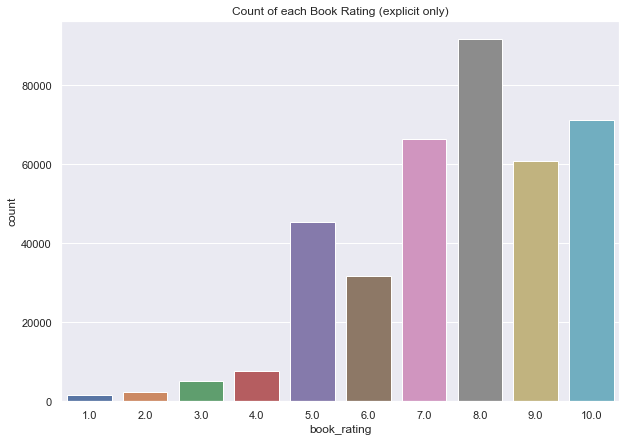

In [435]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 7))
sns.countplot(x='book_rating', data=dfe).set(title='Count of each Book Rating (explicit only)');

### Filter in user_id that contribute to statistical significance
- Some users have only rated one book
- We can filter out those that do not really contribute to statistical significance
- Keep users who have rated more than 100 books

#### For user_id

In [396]:
# for each user_id, count how many times they have rated a book
user_id_counts = dfe['user_id'].value_counts()

In [398]:
# show True/False if they have rated more than 100 books
user_id_counts >= 100

11676.0     True 
98391.0     True 
189835.0    True 
153662.0    True 
23902.0     True 
            ...  
211082.0    False
276229.0    False
54614.0     False
239561.0    False
259679.0    False
Name: user_id, Length: 68091, dtype: bool

In [400]:
# return only users that have read more than 100 books
user_id_counts[user_id_counts>=100]

11676.0     6943
98391.0     5691
189835.0    1899
153662.0    1845
23902.0     1180
            ... 
33145.0     100 
36299.0     100 
208406.0    100 
95010.0     100 
211919.0    100 
Name: user_id, Length: 449, dtype: int64

In [418]:
# get an index object consisting of the user_id of those who have rated more than 100 books
user_id_counts[user_id_counts>=100].index

Float64Index([ 11676.0,  98391.0, 189835.0, 153662.0,  23902.0, 235105.0,
               76499.0, 171118.0,  16795.0, 248718.0,
              ...
              109901.0,  36609.0, 169682.0, 156300.0,  26544.0,  33145.0,
               36299.0, 208406.0,  95010.0, 211919.0],
             dtype='float64', length=449)

In [431]:
# filter in rows with user_id who have rated more than 100 books
df_filtered = dfe[dfe['user_id'].isin(user_id_counts[user_id_counts>=100].index)]

In [433]:
# a check to see if it worked
df_filtered['user_id'].value_counts()

11676.0     6943
98391.0     5691
189835.0    1899
153662.0    1845
23902.0     1180
            ... 
36299.0     100 
36609.0     100 
169682.0    100 
95010.0     100 
208406.0    100 
Name: user_id, Length: 449, dtype: int64

In [ ]:
# so if you put that together, these are the combined steps
user_id_counts = dfe['user_id'].value_counts()
greater99 = user_id_counts[user_id_counts>=100].index
df_filtered = dfe[dfe['user_id'].isin(greater99)]

In [434]:
df_filtered

,isbn,book_title,book_author,year_of_publication,publisher,user_id,book_rating,location,age
80,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676.0,8.0,"n/a, n/a, n/a",35
81,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,11676.0,9.0,"n/a, n/a, n/a",35
82,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,11676.0,8.0,"n/a, n/a, n/a",35
84,0440234743,The Testament,John Grisham,1999,Dell,11676.0,9.0,"n/a, n/a, n/a",35
85,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume,11676.0,8.0,"n/a, n/a, n/a",35
...,...,...,...,...,...,...,...,...,...
954156,0263827461,A Poor Relation (Historical Romance: Regency),Joanna Maitland,2001,Harlequin Mills &amp; Boon Ltd,163759.0,5.0,"abertillery, wales, united kingdom",37
954157,0263816575,Mistress of Madderlea (Historical Romance: Regency),Mary Nichols,1999,Harlequin Mills &amp; Boon Ltd,163759.0,5.0,"abertillery, wales, united kingdom",37
954158,0440222974,A Fire in Heaven,Annee Carter,1998,Dell Publishing Company,163759.0,5.0,"abertillery, wales, united kingdom",37
954159,0373059191,"Mr. Easy (Man Of The Month) (Silhouette Desire, No 919)",Cait London,1995,Silhouette,163759.0,4.0,"abertillery, wales, united kingdom",37


### Lets save our work again

In [436]:
# df_filtered.to_csv('df_filtered.csv', index = False)

In [437]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103271 entries, 80 to 954160
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   isbn                 103271 non-null  object 
 1   book_title           103271 non-null  object 
 2   book_author          103271 non-null  object 
 3   year_of_publication  103271 non-null  int32  
 4   publisher            103271 non-null  object 
 5   user_id              103271 non-null  float64
 6   book_rating          103271 non-null  float64
 7   location             103271 non-null  object 
 8   age                  103271 non-null  int32  
dtypes: float64(2), int32(2), object(5)
memory usage: 7.1+ MB


## Data Modeling Preparation

### Data Duplication removal

In [482]:
# lets drop some duplicate first: combination of book_title and user_id
df_filtered = df_filtered.drop_duplicates(['user_id', 'book_title'])

In [484]:
df_filtered.shape

(102497, 9)

As you can see, the shape of the dataframe has changed, indicating that there were duplicates

### Create Pivot table

In [486]:
# convert our data to a pivot table to be used later in our algorithm
book_rater_pivot_table = pd.pivot_table(df_filtered, values = 'book_rating', index='book_title', columns='user_id')

An important observation is that a majority of the values in this ratings matrix are NaNs due to the absence of ratings. Not every user has rated every book. This also highlights the fact that the data is sparse.

In [488]:
book_rater_pivot_table.head()

user_id,2033.0,2110.0,2276.0,4017.0,4385.0,5582.0,6242.0,6251.0,6543.0,6575.0,...,269566.0,270713.0,271448.0,271705.0,273113.0,274061.0,274301.0,275970.0,277427.0,278418.0
book_title,,,,,,,,,,,,,,,,,,,,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dark Justice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Final Fantasy Anthology: Official Strategy Guide (Brady Games),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Good Wives: Image and Reality in the Lives of Women in Northern New England, 1650-1750",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Create a 2D Matrix
- we fill the missing values to 0's since we have to calculate distances between rating vectors
- convert our pivot table into a 2D matrix

In [525]:
# fill all NaN values in pivot table to 0
book_rater_pivot_table = book_rater_pivot_table.fillna(0)

In [526]:
# scipy sparse matrix allows for efficienct calculations
from scipy.sparse import csr_matrix

book_rater_matrix = csr_matrix(book_rater_pivot_table.values)

### Model Training

In [853]:
from sklearn.neighbors import NearestNeighbors

knn_model = NearestNeighbors(algorithm ='auto', metric='cosine')
knn_model.fit(book_rater_matrix)

NearestNeighbors(metric='cosine')

### Recommender Functions

In [866]:
# this function will take a book title as a parameter and return the top k books with user-based coll
def recommend_me(book):

    X = (book_rater_pivot_table[book_rater_pivot_table.index == book]).to_numpy().reshape(1,-1)

    distances, indices = model.kneighbors(X,n_neighbors=8)
    
    print('Recommendations for {0}\n'.format(book))
    
    for i in (range(0, len(distances.flatten()))):
        if i == 0:
            pass
        else:
            print('{0}: {1}, {2}'.format(i, book_rater_pivot_table.index[indices.flatten()[i]], distances.flatten()[i]))

In [814]:
# this will randomly generate a book title
def random_book():
    return book_rater_pivot_table.index[np.random.choice(book_rater_pivot_table.shape[0])]

### Recommendation tests

In [867]:
recommend_me("The Da Vinci Code")

Recommendations for The Da Vinci Code

1: Angels &amp; Demons, 0.6659512685669161
2: Sudden Mischief, 0.6851855109934675
3: Thin Air, 0.6898595407016141
4: Widow's Walk, 0.6901595521176096
5: Sleep Tight (Onyx Book), 0.7098275303701321
6: The Twentieth Wife: A Novel, 0.7103306171865174
7: The Secret Life of Bees, 0.7108366911300672


In [868]:
recommend_me("Harry Potter and the Chamber of Secrets (Book 2)")

Recommendations for Harry Potter and the Chamber of Secrets (Book 2)

1: Harry Potter and the Prisoner of Azkaban (Book 3), 0.3117848901612861
2: Harry Potter and the Goblet of Fire (Book 4), 0.3851457608159966
3: Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)), 0.4632087898866173
4: Harry Potter and the Sorcerer's Stone (Book 1), 0.49707561783110865
5: Harry Potter and the Order of the Phoenix (Book 5), 0.5751529542719905
6: The Fellowship of the Ring (The Lord of the Rings, Part 1), 0.7068453434890638
7: Charlotte's Web (Trophy Newbery), 0.728662118327992


In [852]:
recommend_me("Jurassic Park")

Recommendations for Jurassic Park

1: The Lost World, 0.6641687742903724
2: The Body Farm, 0.6788319263532404
3: McNally's Caper (Archy McNally Novels (Paperback)), 0.6982630747689296
4: Evergreen, 0.7003886173557063
5: Congo, 0.7036224693170985
6: Rising Sun, 0.7036351378986725
7: The Terminal Man, 0.7088612555055237


In [817]:
recommend_me("Where the Heart Is (Oprah's Book Club (Paperback))")

Recommendations for Where the Heart Is (Oprah's Book Club (Paperback))

1: The Weight of Water, 0.6283692145666454
2: Blue Diary, 0.6340001174711973
3: Dry: A Memoir, 0.636862263545031
4: The Lovely Bones: A Novel, 0.6526354452036713
5: Until the Real Thing Comes Along:, 0.6684095980008508
6: Shadows of Yesterday, 0.6704190845785811
7: Deck the Halls (Holiday Classics), 0.6730376808397955


In [830]:
recommend_me('The Diving Bell and the Butterfly : A Memoir of Life in Death')

Recommendations for The Diving Bell and the Butterfly : A Memoir of Life in Death

1: The Hottest State: A Novel, 0.3532474553562701
2: The Age of Miracles, 0.3571428571428572
3: Ellen Gilchrist : Collected Stories, 0.3571428571428572
4: The Short History of a Prince : A Novel, 0.35754426657497584
5: News of the Spirit, 0.3633180421295925
6: The Third Deadly Sin, 0.4082020313510778
7: The Age of Grief, 0.42983705265336636


In [847]:
# book recommendation using a random book title
recommend_me(random_book())

Recommendations for The Town

1: The Walking, 0.24043944650065308
2: The House, 0.27372696079743686
3: Salem's Lot, 0.3527817966752387
4: The Mailman, 0.3699380808380639
5: Vespers, 0.42218655362461577
6: Revenge (L.a. Connections), 0.442738502088886
7: Inner Simplicity : 100 Ways to Regain Peace and Nourish Your Souls, 0.4428289666183637


In [877]:
recommend_me(random_book())

Recommendations for Blue Adept (Apprentice Adept (Paperback))

1: Juxtaposition (Apprentice Adept (Paperback)), 0.3319405389964011
2: Out of Phaze (Apprentice Adept (Paperback)), 0.3521432952734418
3: Phaze Doubt (Apprentice Adept Series, Book 7), 0.3521432952734418
4: Source of Magic, 0.35347027365393013
5: Fortress of Frost and Fire (The Bard's Tale, Book 2), 0.35561873682532696
6: Man from Mundania (Xanth Trilogy, No 12), 0.37994671148365744
7: Isle of Woman (Geodyssey), 0.3978207696903052


### BONUS: Popularity based system

In [896]:
count_ratings = pd.DataFrame(df_filtered.groupby(['isbn'])['book_rating'].sum())
top_10 = count_ratings.sort_values('book_rating', ascending = False).head(10)
top_10.merge(books, on='isbn', how='left')

,isbn,book_rating,book_title,book_author,year_of_publication,publisher
0,0316666343,595.0,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
1,059035342X,411.0,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),J. K. Rowling,1999,Arthur A. Levine Books
2,043935806X,409.0,Harry Potter and the Order of the Phoenix (Book 5),J. K. Rowling,2003,Scholastic
3,0385504209,400.0,The Da Vinci Code,Dan Brown,2003,Doubleday
4,0312195516,375.0,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
5,0446310786,358.0,To Kill a Mockingbird,Harper Lee,1988,Little Brown &amp; Company
6,0439139597,331.0,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,Scholastic
7,0345370775,320.0,Jurassic Park,Michael Crichton,1999,Ballantine Books
8,0439136350,300.0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,1999,Scholastic
9,0439064864,295.0,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,1999,Scholastic
